In [1]:
import nltk

In [2]:
from gensim.models import KeyedVectors

In [4]:
embeddings = KeyedVectors.load_word2vec_format('D:/xxx/GoogleNews-vectors-negative300.bin', binary = True)

In [5]:
type(embeddings)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [7]:
vocab = embeddings.vocab

In [11]:
list(vocab.keys())[:200],vocab['india'],vocab['delhi']

(['</s>',
  'in',
  'for',
  'that',
  'is',
  'on',
  '##',
  'The',
  'with',
  'said',
  'was',
  'the',
  'at',
  'not',
  'as',
  'it',
  'be',
  'from',
  'by',
  'are',
  'I',
  'have',
  'he',
  'will',
  'has',
  '####',
  'his',
  'an',
  'this',
  'or',
  'their',
  'who',
  'they',
  'but',
  '$',
  'had',
  'year',
  'were',
  'we',
  'more',
  '###',
  'up',
  'been',
  'you',
  'its',
  'one',
  'about',
  'would',
  'which',
  'out',
  'can',
  'It',
  'all',
  'also',
  'two',
  'after',
  'first',
  'He',
  'do',
  'time',
  'than',
  'when',
  'We',
  'over',
  'last',
  'new',
  'other',
  'her',
  'people',
  'into',
  'In',
  'our',
  'there',
  'A',
  'she',
  'could',
  'just',
  'years',
  'some',
  'U.S.',
  'three',
  'million',
  'them',
  'what',
  'But',
  'so',
  'no',
  'like',
  'if',
  'only',
  'percent',
  'get',
  'did',
  'him',
  'game',
  'back',
  'because',
  'now',
  '#.#',
  'before',
  'company',
  'any',
  'team',
  'against',
  'off',
  'T

In [13]:
with open('D:/xxx/capitals and cities.txt','r') as f:
    lines = f.read()

In [18]:
countries = list(set(nltk.word_tokenize(lines)))+['India','Delhi']

In [19]:
countries

['Astana',
 'China',
 'Spain',
 'Lebanon',
 'Khartoum',
 'Somalia',
 'Sweden',
 'Podgorica',
 'Finland',
 'Estonia',
 'Harare',
 'Pakistan',
 'Italy',
 'Gabon',
 'Brussels',
 'Malta',
 'Caracas',
 'Georgetown',
 'Syria',
 'Iraq',
 'Cairo',
 'Riga',
 'Canada',
 'Belgrade',
 'Kigali',
 'Kazakhstan',
 'Hungary',
 'Bern',
 'Kenya',
 'Belmopan',
 'Nassau',
 'Guyana',
 'Tunis',
 'Romania',
 'Lusaka',
 'Latvia',
 'Poland',
 'Tegucigalpa',
 'Turkmenistan',
 'Bahamas',
 'Paris',
 'Venezuela',
 'Samoa',
 'Gambia',
 'Havana',
 'Ghana',
 'Cuba',
 'Liberia',
 'Dushanbe',
 'Nepal',
 'England',
 'Nicosia',
 'Yerevan',
 'Ireland',
 'Chile',
 'Bishkek',
 'Islamabad',
 'Vilnius',
 'Slovenia',
 'Cyprus',
 'Rome',
 'Oman',
 'Mogadishu',
 'Macedonia',
 'Warsaw',
 'Vietnam',
 'Manama',
 'Tallinn',
 'Suriname',
 'Suva',
 'Quito',
 'Sofia',
 'Ashgabat',
 'Helsinki',
 'Baghdad',
 'Tehran',
 'Conakry',
 'France',
 'Luanda',
 'Iran',
 'Chisinau',
 'Jakarta',
 'Manila',
 'Denmark',
 'Uruguay',
 'Damascus',
 'Berl

In [65]:
some = ['positive','negative','Dog','Cat','God','Religion','Diety','king', 'queen', 'oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

In [66]:
new_lis = countries+some

In [67]:
def get_embeddings(embeddings):
    word_embeddings = {}
    for word in embeddings.vocab:
        if word in new_lis:
            word_embeddings[word] = embeddings[word]
    return word_embeddings

In [68]:
word_embeddings = get_embeddings(embeddings)

In [69]:
import numpy as np
def cosine_similarity(A,B,embedding):
    dot = np.dot(A,B)
    l1 = np.linalg.norm(A)
    l2 = np.linalg.norm(B)
    
    return dot/(l1*l2)

In [70]:
king = word_embeddings['king']
queen = word_embeddings['queen']

In [71]:
cosine_similarity(king,queen,word_embeddings)

0.6510957

In [72]:
def get_city(city1,country1,city2,embeddings):
    
    city1_em = embeddings[city1]
    country1_em = embeddings[country1]
    city2_em = embeddings[city2]
    group = set((city1,country1,city2))
    vec = country1_em - city1_em + city2_em
    
    similarity =-1
    
    country =' '
    for word in embeddings.keys():
        if word not in group:
            emb = cosine_similarity(embeddings[word],vec,embeddings)
            if emb > similarity:
                similarity = emb
                country = (word,similarity)
    return country

In [73]:
get_city('Islamabad','Pakistan','London',word_embeddings)

('England', 0.49735585)

In [74]:
def get_vectors(embeddings, words):
    """
    Input:
        embeddings: a word 
        fr_embeddings:
        words: a list of words
    Output: 
        X: a matrix where the rows are the embeddings corresponding to the rows on the list
        
    """
    m = len(words)
    X = np.zeros((1, 300))
    for word in words:
        english = word
        eng_emb = embeddings[english]
        X = np.row_stack((X, eng_emb))
    X = X[1:,:]
    return X

In [75]:
def compute_pca(x,n_components):
    
    #calculate the demeaned data mean centering
    X_demeaned = x - x.mean(axis=0)
    covarience_matrix = np.cov(X_demeaned,rowvar=False)
    
    eigen_vals,eigen_vecs =  np.linalg.eigh(covarience_matrix)
    
    idx_sorted = np.argsort(eigen_vals)
    
    idx_sorted_decreasing = idx_sorted[::-1]
    
    eigen_vecs_decreasing = eigen_vecs[:,idx_sorted_decreasing]
    
    eigen_vecs_subset = eigen_vecs_decreasing[:,:n_components]
    
    X_reduced = np.dot(eigen_vecs_subset.T,X_demeaned.T).T
    
    return X_reduced

In [76]:
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_pca(X, n_components=2)
print("Your original matrix was " + str(X.shape) + " and it became:")
print(X_reduced,X_reduced.shape)

Your original matrix was (3, 10) and it became:
[[ 0.43437323  0.49820384]
 [ 0.42077249 -0.50351448]
 [-0.85514571  0.00531064]] (3, 2)


In [77]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful','positive','negative','Dog','Cat','God','Diety','Religion']

# given a list of words and the embeddings, it returns a matrix with all the embeddings
X = get_vectors(word_embeddings, words)

print('You have 11 words each of 300 dimensions thus X.shape is:', X.shape)

You have 11 words each of 300 dimensions thus X.shape is: (18, 300)


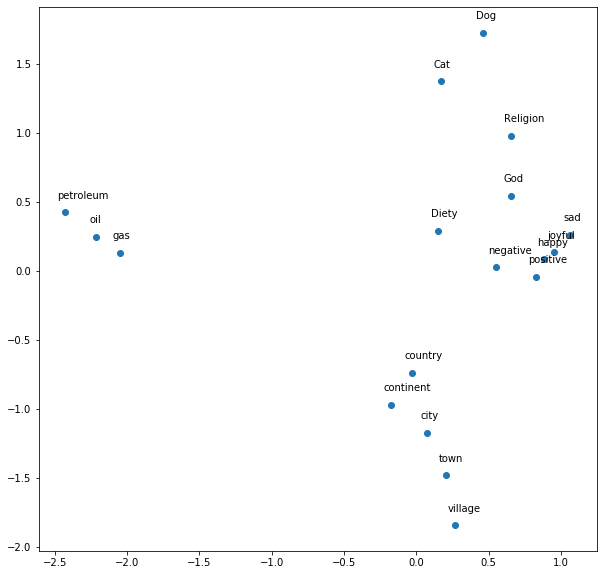

In [78]:
# We have done the plotting for you. Just run this cell.
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()